In [1]:
from indicator import *

# Load OHLCV data

In [3]:
data = load_json_data(path='ohlcv_ethbtc_1m_binance.json')
data.head()

open      high       low     close  volume  \
_id                                                                   
2019-12-31 23:00:00  0.017921  0.017929  0.017918  0.017928   9.252   
2019-12-31 23:01:00  0.017929  0.017935  0.017921  0.017923  40.388   
2019-12-31 23:02:00  0.017925  0.017931  0.017921  0.017924  18.532   
2019-12-31 23:03:00  0.017926  0.017926  0.017914  0.017918  41.397   
2019-12-31 23:04:00  0.017917  0.017933  0.017917  0.017931  12.323   

                                 close_time  quote_asset_volume  \
_id                                                               
2019-12-31 23:00:00 2019-12-31 23:00:59.999            0.165815   
2019-12-31 23:01:00 2019-12-31 23:01:59.999            0.724055   
2019-12-31 23:02:00 2019-12-31 23:02:59.999            0.332241   
2019-12-31 23:03:00 2019-12-31 23:03:59.999            0.741791   
2019-12-31 23:04:00 2019-12-31 23:04:59.999            0.220901   

                     number_of_trades  
_id                                    
2019-12-31 23:00:00                50  
2019-12-31 23:01:00                73  
2019-12-31 23:02:00                45  
2019-12-31 23:03:00                58  
2019-12-31 23:04:00                64

# Sample data by `start_date`, `end_date` and `timeframe`

In [14]:
ohlcv_2020 = resample_ohlcv_data(data=data, start_time='2020-01-01 00:00:00', end_time='2020-12-31 00:00:00', timeframe='H')
ohlcv_2020.head()

open     close      high       low    volume  \
_id                                                                     
2020-01-01 00:00:00  0.017954  0.017957  0.017969  0.017920  2000.674   
2020-01-01 01:00:00  0.017958  0.018105  0.018105  0.017945  4823.820   
2020-01-01 02:00:00  0.018106  0.018066  0.018145  0.018058  2885.612   
2020-01-01 03:00:00  0.018067  0.018021  0.018073  0.017995  1732.547   
2020-01-01 04:00:00  0.018020  0.018040  0.018081  0.018009  2129.117   

                                 close_time  quote_asset_volume  \
_id                                                               
2020-01-01 00:00:00 2020-01-01 00:59:59.999           35.901103   
2020-01-01 01:00:00 2020-01-01 01:59:59.999           87.023004   
2020-01-01 02:00:00 2020-01-01 02:59:59.999           52.191288   
2020-01-01 03:00:00 2020-01-01 03:59:59.999           31.229505   
2020-01-01 04:00:00 2020-01-01 04:59:59.999           38.416704   

                     number_of_trades  
_id                                    
2020-01-01 00:00:00              2973  
2020-01-01 01:00:00              4455  
2020-01-01 02:00:00              3388  
2020-01-01 03:00:00              3025  
2020-01-01 04:00:00              2939

# Calcuate RSI over `period` using close prices

In [15]:
rsi_2020 = rsi(ohlcv_2020['close'], periods=14)
rsi_2020

_id
2020-01-01 00:00:00          NaN
2020-01-01 01:00:00          NaN
2020-01-01 02:00:00          NaN
2020-01-01 03:00:00          NaN
2020-01-01 04:00:00          NaN
                         ...    
2020-12-30 20:00:00    49.868262
2020-12-30 21:00:00    47.793709
2020-12-30 22:00:00    53.683786
2020-12-30 23:00:00    41.810709
2020-12-31 00:00:00    50.953070
Freq: H, Name: close, Length: 8761, dtype: float64

# Calculate RSI high, low percentages

In [16]:
high = 70
low = 30
high_percentage = (len(rsi_2020[rsi_2020 > high]) / len(rsi_2020)) * 100
low_percentage = (len(rsi_2020[rsi_2020 < low]) / len(rsi_2020)) * 100
high_percentage, low_percentage

(12.213217669215842, 10.135829243237074)

# Calculate week-hours distributions

<AxesSubplot:xlabel='_id'>

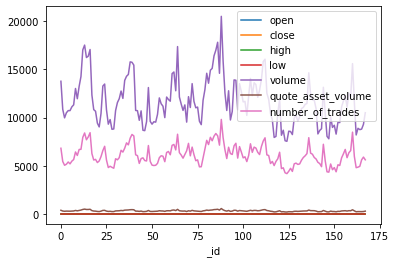

In [20]:
distribution = ohlcv_2020.groupby(ohlcv_2020.index.weekday * 24 + ohlcv_2020.index.hour)
distribution.mean().plot()

In [21]:
distribution.describe()

open                                                              \
    count      mean       std       min       25%       50%       75%   
_id                                                                     
0    52.0  0.027069  0.005147  0.017904  0.023057  0.026013  0.031409   
1    52.0  0.027083  0.005132  0.017788  0.023117  0.025951  0.031587   
2    52.0  0.027111  0.005144  0.017817  0.023167  0.025890  0.031859   
3    52.0  0.027087  0.005135  0.017621  0.023171  0.025806  0.031795   
4    52.0  0.027060  0.005119  0.017686  0.023177  0.025739  0.031658   
..    ...       ...       ...       ...       ...       ...       ...   
163  52.0  0.027025  0.005136  0.017813  0.023137  0.025767  0.031177   
164  52.0  0.027040  0.005133  0.017766  0.023147  0.025693  0.031167   
165  52.0  0.027023  0.005118  0.017783  0.023176  0.025715  0.031310   
166  52.0  0.027041  0.005155  0.017823  0.022967  0.025709  0.031332   
167  52.0  0.027045  0.005133  0.017830  0.023057  0.025871  0.031414   

              close            ... quote_asset_volume               \
          max count      mean  ...                75%          max   
_id                            ...                                   
0    0.036622  52.0  0.027082  ...         523.605311  1429.642337   
1    0.036429  52.0  0.027111  ...         390.559670  1292.984088   
2    0.036511  52.0  0.027086  ...         330.018505  2165.647506   
3    0.036427  52.0  0.027060  ...         324.504645  1540.028134   
4    0.036393  52.0  0.027071  ...         415.656801  1042.028186   
..        ...   ...       ...  ...                ...          ...   
163  0.036625  52.0  0.027040  ...         263.727316  1487.723975   
164  0.036509  52.0  0.027023  ...         289.931551   938.051501   
165  0.036340  52.0  0.027040  ...         259.164951   927.079272   
166  0.036384  52.0  0.027045  ...         333.692303   948.245102   
167  0.036392  52.0  0.027068  ...         372.267328  1101.797651   

    number_of_trades                                                     \
               count         mean          std     min      25%     50%   
_id                                                                       
0               52.0  6824.250000  4393.526356  2037.0  4319.25  5757.5   
1               52.0  5453.384615  3140.488036  1864.0  3390.75  4317.5   
2               52.0  5059.057692  3200.413554  1738.0  3203.75  4016.5   
3               52.0  5166.884615  3616.084366  1483.0  2981.75  3923.5   
4               52.0  5399.519231  3696.864350  1710.0  3029.75  3883.5   
..               ...          ...          ...     ...      ...     ...   
163             52.0  4862.634615  3149.453965  1570.0  3066.25  3782.0   
164             52.0  4950.884615  2908.426875  1504.0  2922.25  4181.5   
165             52.0  5622.269231  4059.628574  1518.0  3060.00  4618.5   
166             52.0  5906.846154  3510.611959  1631.0  3590.75  5040.0   
167             52.0  5625.038462  3546.430555  1455.0  3299.25  5017.5   

                       
         75%      max  
_id                    
0    7967.50  25584.0  
1    6874.50  16407.0  
2    6356.00  21657.0  
3    5675.00  21966.0  
4    6100.25  19285.0  
..       ...      ...  
163  5312.75  15289.0  
164  6028.25  15504.0  
165  6273.00  22614.0  
166  7547.00  20109.0  
167  6113.50  19698.0  

[168 rows x 56 columns]

# Top 3 highest `number_of_trades`

<AxesSubplot:xlabel='_id'>

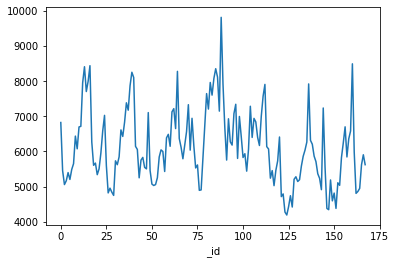

In [23]:
distribution['number_of_trades'].mean().plot()

In [25]:
distribution['number_of_trades'].mean().nlargest(3)

_id
88     9816.211538
160    8494.230769
16     8440.807692
Name: number_of_trades, dtype: float64

# Calculate the correlation between the volume and the RSI value

In [27]:
rsi_2020.corr(ohlcv_2020['volume'])

0.03996532231599322